# NN with Tensorflow-Keras

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

In [3]:
# Load
(Xtrain,ytrain),(Xtest,ytest)=mnist.load_data()

In [4]:
# Dividir os dados de treino e validacao
#Convert labels into vectors (one hot encoding).
Ntrain=40000    

Xvalid=Xtrain[Ntrain:]*1. # "*1."→ to convert to float
yvalid=ytrain[Ntrain:]
Xtrain=Xtrain[:Ntrain]*1.
ytrain=ytrain[:Ntrain]

Xtest=Xtest*1.

print(Xvalid.shape)
print(yvalid.shape)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)

print(Xtrain[0].shape)

(20000, 28, 28)
(20000,)
(40000, 28, 28)
(40000,)
(10000, 28, 28)
(28, 28)


In [16]:
print(ytrain.shape)
print(ytrain)
print(ytrainB.shape)
print(ytrainB[0])

(40000,)
[5 0 4 ... 9 9 5]
(40000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Como escolher o nuemro de camadas e neuronios?
# escolher a funcao loss? 
#       loss="binary_crossentropy" ou "categorical_crossentropy"
# Escolher o optimador:
#   optimizer="Adam" ou Nadam
# como escolher a funcao de ativacao?

# pre-processing (e.g Flatten, Masking)
# PArametros do fit(Xtrain,ytrain,epochs=10,batch size=1024, validation data=(Xvalid,yvalid))
#    epochs : numero de veze que passa nos dados durante o treino
#    Batch_size:

In [17]:
# Passar para lista de 0 e 1 em vez de um 5 = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

ytrainB=keras.utils.to_categorical(ytrain)
yvalidB=keras.utils.to_categorical(yvalid)
ytestB=keras.utils.to_categorical(ytest)


### Criar a rede

In [18]:
#Iniciar o tipo de rede    
#  -Keras has available two types of models: the sequential 
#   models and models defined with Keras functional API
nn=keras.Sequential()

#Camadas escondidas
# Flatten - passa tudo para um vetor 
# reduces the input data into a single dimension instead of 2 dimensions
nn.add(keras.layers.Flatten(input_shape=[28, 28])) # Reshapeof the input
nn.add(keras.layers.Dense(50, activation="tanh"))
nn.add(keras.layers.Dense(10,activation='softmax')) # softmax activation (outputs = number of classes)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# To check the configuration of a given model, use the .summary() method
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


### Compilar e treinar

In [20]:
nn.compile(optimizer="nadam", loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
train=nn.fit(Xtrain, ytrainB, 
             epochs=10, 
             batch_size=1024, 
             validation_data= (Xvalid, yvalidB))

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 1s 24us/sample - loss: 1.6282 - acc: 0.4827 - val_loss: 0.9857 - val_acc: 0.7206
Epoch 2/10
40000/40000 [==============================] - 1s 13us/sample - loss: 0.8074 - acc: 0.7726 - val_loss: 0.6757 - val_acc: 0.8133
Epoch 3/10
40000/40000 [==============================] - 1s 13us/sample - loss: 0.6040 - acc: 0.8315 - val_loss: 0.5555 - val_acc: 0.8407
Epoch 4/10
40000/40000 [==============================] - 1s 13us/sample - loss: 0.5157 - acc: 0.8522 - val_loss: 0.4922 - val_acc: 0.8592
Epoch 5/10
40000/40000 [==============================] - 0s 12us/sample - loss: 0.4518 - acc: 0.8719 - val_loss: 0.4376 - val_acc: 0.8752
Epoch 6/10
40000/40000 [==============================] - 0s 12us/sample - loss: 0.4125 - acc: 0.8830 - val_loss: 0.4018 - val_acc: 0.8857
Epoch 7/10
40000/40000 [==============================] - 0s 12us/sample - loss: 0.3833 - acc: 0.8920 - val_loss: 0.

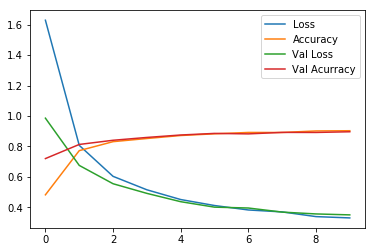

In [22]:
h=train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["acc"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_acc"], label='Val Acurracy')
plt.legend()
plt.show()

## Avaliar a performace

In [29]:
#Predictions on the test set
yOut=nn.predict(Xtest)

#The predicted outputs have to be converted back to integer labels (0-9)
ytestPred=np.argmax(yOut,axis=1)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ytestPred))

[[ 949    0    4    4    0    5   12    2    3    1]
 [   0 1097   11   10    0    4    3    0   10    0]
 [  15    1  931   24   15    3    6    9   25    3]
 [   4    1   31  896    0   33    2   12   24    7]
 [   2    4    8    3  862    4   15    4    8   72]
 [  19    1    6   50    4  744   18    5   37    8]
 [  16    3    8    3   12   15  895    0    6    0]
 [   2   10   24   13    9    1    1  925    4   39]
 [  15    5   14   30    7   39   13   14  813   24]
 [  10    4    2   14   25    5    2   24   14  909]]


In [31]:
nn.evaluate(Xtest, ytestB)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3368 - acc: 0.9021


[0.3368219717621803, 0.9021]

### Guardar o modelo

In [1]:
# If you need to install the package: pip -install h5py.
from tensorflow.keras.models import load_model
nn=load_model

In [34]:
import tensorflow as tf
fileName = "fileeee"
tf.keras.callbacks.ModelCheckpoint(fileName, monitor="val_loss", 
                                           verbose=1, save_best_only=True, 
                                           save_weights_only=False, mode="auto", 
                                           period=1)

In [5]:
tf.keras.callbacks.EarlyStopping(monitor="val loss", patience=5, 
                                         verbose=1, mode="auto", 
                                         restore_best_weights=True)

## Callbacks

In [ ]:
from tensorflow.keras import callbacks
CB1=callbacks.ModelCheckpoint(fileName1, period=1)

CB2=callbacks.EarlyStopping(monitor="val loss", patience=5, verbose=1, 
                            mode="auto", restore_best_weights=True)
CB3=callbacks.CSVLogger(fileName2, separator=",", append=False)
CBlist=[CB1,CB2,CB3]


In [ ]:
train=nn.fit(Xtrain,ytrain,epochs=10,batch size=1024, 
             validation data=(Xvalid,yvalid), callbacks=CBlist)

In [ ]:
# diferenca entre os dois
## cnn sao um pouco lenta mas prevem melhor
# 